# TD noté

In [29]:
import pandas as pd

In [30]:
file_path = "METABRIC_RNA_Mutation.csv"
metabric_data = pd.read_csv(file_path, sep=',', header=0, index_col=0)
metabric_data.head()

C:\Users\spoto\AppData\Local\Temp\ipykernel_1012\4104476192.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  metabric_data = pd.read_csv(file_path, sep=',', header=0, index_col=0)


,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
patient_id,,,,,,,,,,,,,,,,,,,,,
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


In [31]:
metabric_data = metabric_data.iloc[:, :519]
key_name = "nottingham_prognostic_index"  # metabric_data.columns[20]
start_genes_idx = 30
corre = []
for i in range(start_genes_idx, metabric_data.shape[1]):
    correlation = metabric_data[key_name].corr(metabric_data.iloc[:, i]) ** 2
    corre.append(correlation)

best_idx = sorted(range(len(corre)),
                  key=lambda i: corre[i], reverse=True)[0:100]
best_idx = [i + start_genes_idx for i in best_idx]

metabric_data_clean = metabric_data.iloc[:, list(range(30)) + best_idx]
metabric_data_clean.iloc[:, 25:35].head()

,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,aurka,chek1,aph1b,cdk1,bcl2
patient_id,,,,,,,,,,
0,1,ER-/HER2-,22.0,2.0,Living,-1.5733,-1.6332,-0.0098,-2.0649,0.5371
2,1,ER+/HER2- High Prolif,10.0,1.0,Living,-0.3052,-0.9604,0.6880,0.3895,0.3243
5,0,NaN,15.0,2.0,Died of Disease,-0.2248,0.7585,-0.4959,1.2949,-1.0989
6,1,NaN,25.0,2.0,Living,2.0447,-0.8414,-1.2458,0.0476,0.2252
8,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,0.5882,0.4420,0.3690,1.1035,-1.2477


## Question 1
### Creation de l'ACP normée

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'metabric_data_clean' is your dataset
interpretation_data = metabric_data_clean.iloc[:, :30]
genes_data = metabric_data_clean.iloc[:, 30:]

# Standardize the genes data
scaler = StandardScaler()
genes_data_scaled = scaler.fit_transform(genes_data)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(genes_data_scaled)

# Create a DataFrame with PCA results
n_components = pca.n_components_
pc_columns = [f'PC{i}' for i in range(1, n_components + 1)]
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

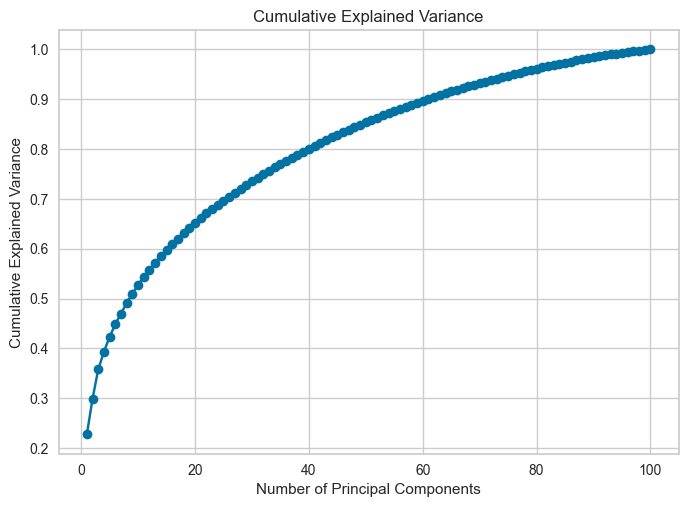

0.8066177973266792


In [33]:
# Plot Cumulative Explained Variance
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print(cumulative_variance_ratio[40])

40 axes permettent d'expliquer 80% de la variance totale. On peut donc se contenter de 40 axes pour la suite de l'analyse.

## Question 2 (Kmeans with different number of clusters)

In [34]:
pca = PCA(n_components=40)
principal_components = pca.fit_transform(genes_data_scaled)
pc_columns = [f'PC{i}' for i in range(1, 41)]

interpretation_data = interpretation_data.reset_index(drop=True)
principal_components = pd.DataFrame(
    data=principal_components, columns=pc_columns).reset_index(drop=True)

# Concatenating the DataFrames
data_after_pca = pd.concat([interpretation_data, principal_components], axis=1)

data_after_pca.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0.211726,-0.333465,0.443030,-0.087642,-0.019613,0.027993,0.788942,-1.581340,-0.025284,0.594654
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0.538946,0.045640,-0.347404,-0.434320,1.055684,0.645602,-1.899349,0.209839,-0.281961,0.370822
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,-1.212400,1.766219,0.153711,-0.940161,0.212503,-0.134767,-0.003211,0.289397,-0.751829,0.932299
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,-0.555879,0.079045,0.033782,0.998593,0.658075,0.450888,0.285385,-0.214108,0.533712,1.700503
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,-0.223716,0.691780,-0.830479,-0.316449,1.397753,-1.602062,1.071295,0.188695,-0.290805,-0.647274


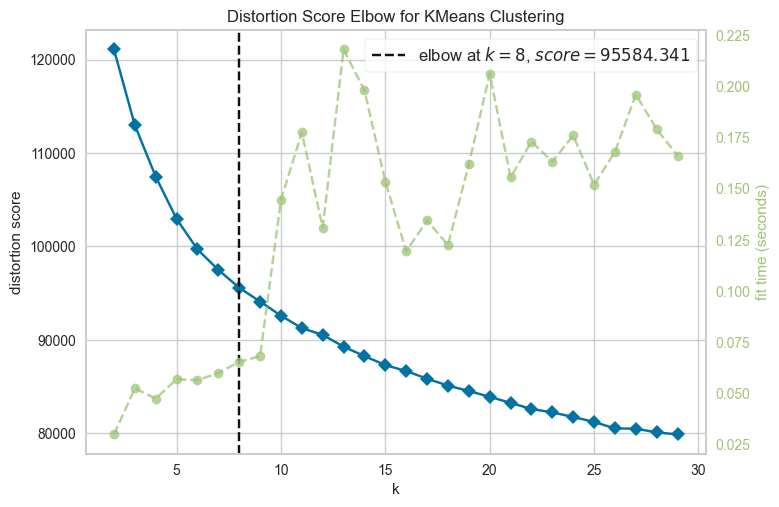

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans_models = []
wcss_scores = []

# n_init set (randomely) to avoid warning
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(2, 30))

visualizer.fit(principal_components)
visualizer.show()

La meilleure valeure de k semble être 9 d'après la méthode du coude (varie entre 8 et 10 selon la génération). Appliquons donc l'algorithme des kmeans avec k=9 pour classer les patientes.

In [36]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels = kmeans.fit_predict(principal_components)

# Add the labels to the data_after_pca DataFrame
data_after_pca['Cluster'] = labels

## Question 3 (plotting the clusters)

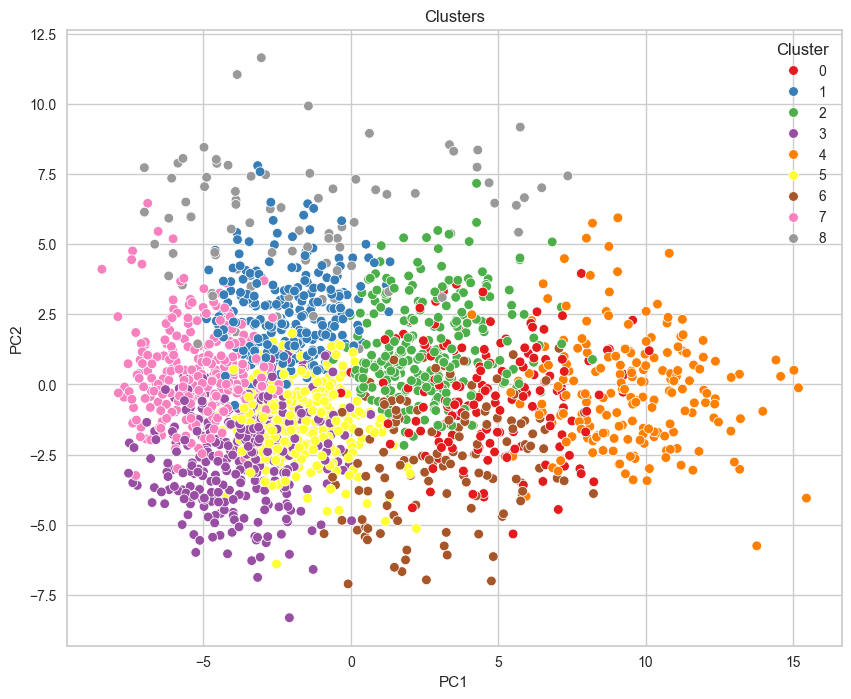

In [37]:
# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_after_pca, palette='Set1')
plt.title('Clusters')
plt.show()

Voyons ce que cela aurait donnée sans la PCA

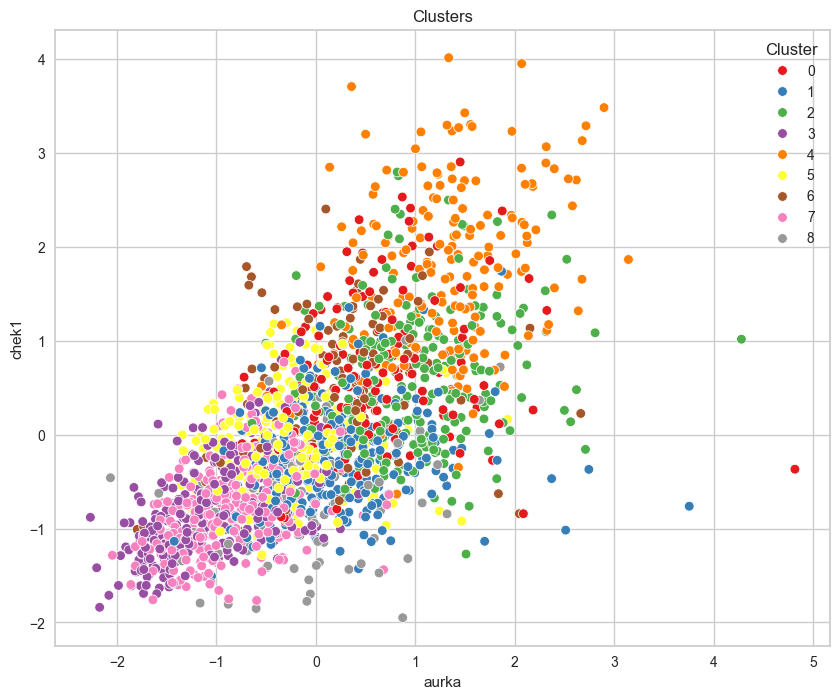

In [38]:

data = metabric_data_clean.copy()
data['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='aurka', y='chek1', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters')
plt.show()

On remarque que l'ACP permet de mieux séparer les clusters avec kmeans. En effet les clusters sont plus compacts et plus séparés dans l'espace des composantes principales.

## Question 4 (Interpretation)

In [55]:
from scipy.stats import chi2_contingency
quantitative_vars_idx = {1, 19, 20, 21, 23, 28}
quantitative_vars_idx = {i - 1 for i in quantitative_vars_idx}
qualitative_vars_idx = list(set(range(30)) - quantitative_vars_idx)

quali_cols = data_after_pca.columns[qualitative_vars_idx]
d1 = data_after_pca["Cluster"]
p_values = []
for col in quali_cols:
    d2 = data_after_pca[col]
    table = pd.crosstab(d1, d2)
    stat, p, dof, expected = chi2_contingency(table)
    p_values.append(p)

p_values = pd.Series(p_values, index=quali_cols)
p_values.sort_values(ascending=True, inplace=True)

print(p_values.head(3))

3-gene_classifier_subtype       0.000000e+00
integrative_cluster             0.000000e+00
pam50_+_claudin-low_subtype     0.000000e+00
er_status                      8.812252e-272
dtype: float64


On trouve que les trois variables qualitatives les plus corrélées avec les clusters sont : 
- 3-gene-classifier_subtype
- integrative_cluster
- pam50_+_claudin-low_subtype

Avec des p-values de 0.0 ie $< 10^{-273}$ 
Cela parait bien bas. Je ne sais pas quoi en penser, d'autant que toutes les p-values ont des valeurs très basses. ($< 0.05$) 

In [62]:
print(pd.crosstab(d1, data_after_pca["3-gene_classifier_subtype"]))
print(pd.crosstab(d1, data_after_pca["integrative_cluster"]))
print(pd.crosstab(d1, data_after_pca["pam50_+_claudin-low_subtype"]))

3-gene_classifier_subtype  ER+/HER2- High Prolif  ER+/HER2- Low Prolif  \
Cluster                                                                  
0                                             14                     4   
1                                            187                    32   
2                                            180                     0   
3                                              4                   240   
4                                              2                     0   
5                                            138                   105   
6                                             18                     8   
7                                             43                   214   
8                                             17                    16   

3-gene_classifier_subtype  ER-/HER2-  HER2+  
Cluster                                      
0                                 41     87  
1                                  1      6  
2

On remarque une colonne qui semble avoir déjà été utilisée pour le clustering : "integrative_cluster". Il est rassurant de voir qu'elle est très corrélée avec les clusters trouvés par notre méthode.

In [61]:
print(data_after_pca["integrative_cluster"].unique())

['4ER+' '3' '9' '7' '4ER-' '5' '8' '10' '1' '2' '6']


Par ailleurs, cette colonne a 11 valeurs differentes, donc 11 clusters. 
Lors de notre choix du nombre de clusters, 11 était une valeur proche du "coude" et aurait pu être la valeure choisie (à la place de 9).